In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import lib.cell_tracking.track_data as track_data
from lib.cell_tracking.track_data import TrackData
import numpy as np

# Plotting functions

In [2]:

def plot_fps(ax, df, chan, label, cell_ids):
    cell = df[df["cell_id"].isin(cell_ids)].sort_values(by=["cell_id", "frame"])
    cell = cell.rolling(10, win_type="gaussian").mean(std=10)
    mean_val = cell[chan].mean()
    cell[chan+"_meann"] = cell[chan]/mean_val
    chan = chan + "_meann"
    ax.plot(cell["frame"], cell[chan], label=label, color=np.random.rand(3))
    ax.set_xlabel("time (hours)")
    return ax

In [16]:
def plot_fps_raw(ax, df, chan, cell_ids, kwargs):
    cell = df[df["cell_id"].isin(cell_ids)].sort_values(by=["cell_id", "frame"])
    totals = cell.groupby("frame").sum()
    if "color" not in kwargs: kwargs["color"] = np.random.rand(3)
    if "label" not in kwargs: kwargs["label"] = label
    ax.plot((totals.index*10)/60, totals[chan], **kwargs)
    
    ax.set_xlabel("time (hours)")
    return ax

In [4]:
def plot_histogram(ax, df, chan):
    print(df["frame"].unique().min())
    print(df["frame"].unique().max())
    times = np.linspace(df["frame"].unique().min(), df["frame"].unique().max()-1, 10).astype(int)
    print(times)
    for t in times:
        selector = (df["frame"]==t) & (df["state"]>0)
        print(df[selector][chan].values)
        data = df[selector][chan].values
        data = data[~np.isnan(data)] 
        ax.hist(data, label="t", alpha=.3, bins=np.linspace(0, 1.6, 10))
    # cell = df[df["cell_id"].isin(cell_ids)].sort_values(by=["cell_id", "frame"])
    # cell = cell.rolling(7, win_type="gaussian").mean(std=5)
    # ax.plot((cell["frame"]*10)/60, np.diff(cell[chan], label="")
    ax.set_xlabel("time (hours)")
    return ax

In [76]:
5 + 31/60

5.516666666666667

# Look at all data sets

../../proc_data/iphox_movies/BF10_timelapse/Column_2/compiled.tsv
Index(['frame', 'cell_id', 'row', 'col', 'angle', 'state', 'length', 'width',
       'g_by_r', 'green', 'red'],
      dtype='object')


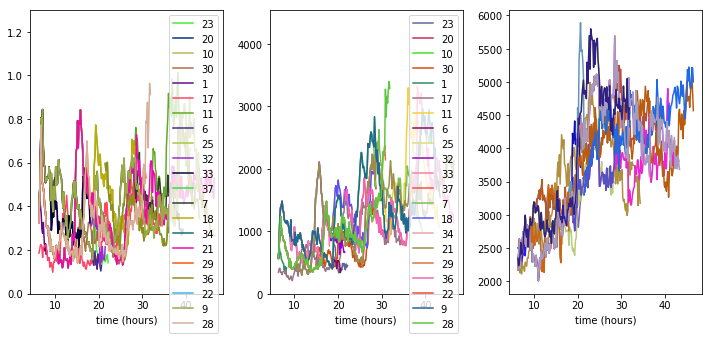

In [6]:

base_dir =  "../../proc_data/iphox_movies/BF10_timelapse/" 

movies = ["Column_2"]
fig, ax = plt.subplots(len(movies), 3)
ax = np.array([ax])
for i, f in enumerate(movies):
    cpath  = os.path.join(base_dir, f , "compiled.tsv")
    print(cpath)
    tdpath = os.path.join(base_dir, f , "cell_track.json")
    td = TrackData(tdpath)
    tree = td.make_tree()
    leaves = track_data.get_leaves(tree)

    df = pd.read_csv(cpath, sep="\t")
    print(df.columns)
#     df["rg"] = df["green"]/df["red"]
#     df["time"] = ((df["frame"]*10)/60/24)

    for l in leaves:
        color = np.random.rand(3)
        plot_fps_raw(ax[i, 0], df, "g_by_r", str(l), td.get_cell_lineage(l))
        plot_fps_raw(ax[i, 1], df, "green", str(l), td.get_cell_lineage(l))
        plot_fps_raw(ax[i, 2], df, "red", str(l), td.get_cell_lineage(l))
    ax[i,0].legend()
    ax[i,1].legend()

    ax[i,0].set_ylim(0, 1.3)
    #ax[i,0].set_xlim(0,380)
    #ax[i].set_xlim(80,120)

fig.set_size_inches(10,5)
plt.tight_layout()



# Load Data

In [7]:
base_dir =  "../../proc_data/iphox_movies/BF10_timelapse/" 
f = "Column_2"
cpath  = os.path.join(base_dir, f , "compiled.tsv")
tdpath = os.path.join(base_dir, f , "cell_track.json")

td = TrackData(tdpath)
tree = td.make_tree()
leaves = track_data.get_leaves(tree)
df = pd.read_csv(cpath, sep="\t")

#df["rg"] = df["green"]/df["red"]
df["time"] = ((df["frame"]*10)/60)/24

## Look at all traces 

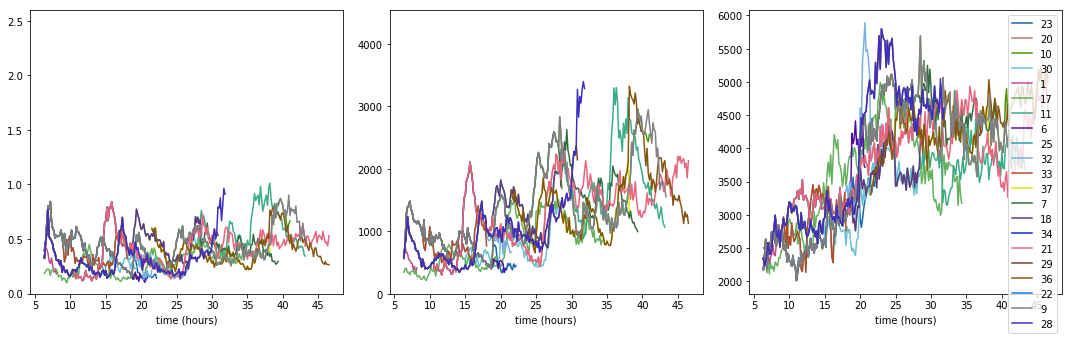

In [23]:
fig, ax = plt.subplots(1, 3)

for l in track_data.get_leaves(tree):
    opts = {"color": np.random.rand(3),
            "label": str(l)}
    
    plot_fps_raw(ax[0], df, "g_by_r", td.get_cell_lineage(l), opts)
    plot_fps_raw(ax[1], df, "green", td.get_cell_lineage(l), opts)
    plot_fps_raw(ax[2], df, "red",  td.get_cell_lineage(l), opts)

# ax[0].legend()
# ax[1].legend()
ax[2].legend()

ax[0].set_ylim(0, 2.6)
# ax[i,0].set_xlim(0,50)
# ax[i,1].set_xlim(0,50)

fig.set_size_inches(15,5)
plt.tight_layout()

## Histograms of all traces

In [65]:
def plot_histograms_overtime(ax, df, chan, bins, **kwargs):
    max_frame = df["frame"].max()+1
    histograms = np.zeros(( len(bins)-1, max_frame))
    #print(bins)
    frames = df["frame"].unique()
    all_frames = np.arange(max_frame)
    for f in frames:
        #print(f)
        hist, binedges = np.histogram((df[df["frame"]==f])[chan].values, range=(0, 1.1), bins=bins, density=True)
        histograms[:, f] = hist
    ax.pcolormesh(all_frames, binedges[:-1],histograms)

    return ax, binedges

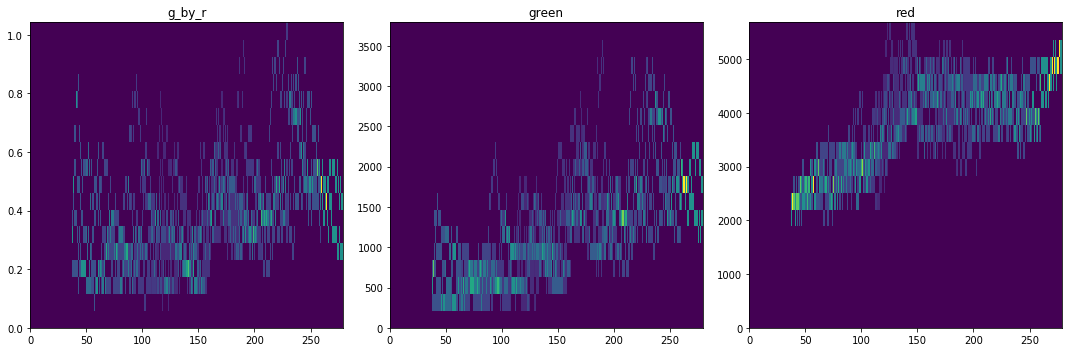

In [69]:
fig, ax = plt.subplots(1, 3)

for l in track_data.get_leaves(tree):
    opts = {}
    
    plot_histograms_overtime(ax[0], df, "g_by_r", np.linspace(0, 1.1, 20), **opts)
    ax[0].set_title("g_by_r")
    plot_histograms_overtime(ax[1], df, "green", np.linspace(0, 4000, 20), **opts)
    ax[1].set_title("green")
    plot_histograms_overtime(ax[2], df, "red", np.linspace(0, 6000, 20), **opts)
    ax[2].set_title("red")



fig.set_size_inches(15,5)
plt.tight_layout()

In [8]:
track_data.get_leaves(tree)

['23',
 '20',
 '10',
 '30',
 '1',
 '17',
 '11',
 '6',
 '25',
 '32',
 '33',
 '37',
 '7',
 '18',
 '34',
 '21',
 '29',
 '36',
 '22',
 '9',
 '28']

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

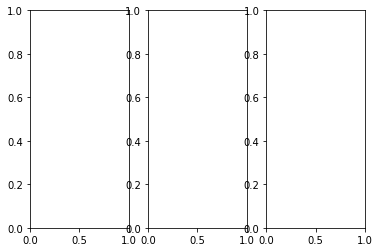

In [70]:

    
fig, ax = plt.subplots(len(movies), 3)
ax = np.array([ax])


#l = "11"
sel = ["11", "28", "17", "21", "7", "19"]
#sel = ["7", "18"]


i = 0
for l in sel: 
    plot_fps_raw(ax[i, 0], df, "g_by_r", str(l), td.get_cell_lineage(l))
    plot_fps_raw(ax[i, 1], df, "green", str(l), td.get_cell_lineage(l))
    plot_fps_raw(ax[i, 2], df, "red", str(l), td.get_cell_lineage(l))

ax[i,0].legend()
ax[i,1].legend()
ax[i,2].legend()


ax[i,0].set_ylim(0, 2.6)
ax[i,0].set_xlim(0,50)
ax[i,1].set_xlim(0,50)


fig.set_size_inches(10,5)
plt.tight_layout()

In [138]:
td.get_cell_lineage("28")

['27', '26', '15', '24', '28']

27
26
15
24
28


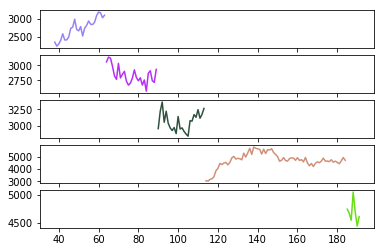

In [139]:
l="17"
cell = df[df["cell_id"].isin(td.get_cell_lineage(l))].sort_values(by=["cell_id", "frame"])
#totals = cell.groupby("frame").sum()
chan="red"
lineage = td.get_cell_lineage("28")
fig, ax = plt.subplots(len(lineage),1, sharex=True)
for i, c in enumerate(lineage):
    print(c)
    cell = df[df["cell_id"].isin([c])].sort_values(by=["cell_id", "frame"])

    ax[i].plot(cell["frame"], cell[chan], label=c, color=np.random.rand(3))



27
14
13
12
11


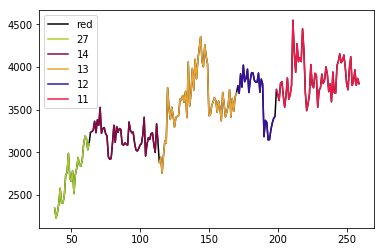

In [74]:
l = "11"
cell = df[df["cell_id"].isin(td.get_cell_lineage(l))].sort_values(by=["cell_id", "frame"])
totals = cell.groupby("frame").sum()
chan="red"
lineage = td.get_cell_lineage(l)
fig, ax = plt.subplots(1,1, sharex=True)
ax.plot(totals.index, totals[chan], color="k")

for i, c in enumerate(lineage):
    print(c)
    cell = df[df["cell_id"].isin([c])].sort_values(by=["cell_id", "frame"])

    
    ax.plot(cell["frame"], cell[chan], label=c, color=np.random.rand(3))

ax.legend()

24
17


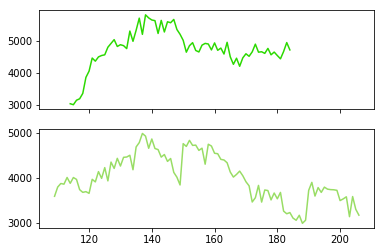

In [13]:

fig, ax = plt.subplots(2,1, sharex=True)
for i, c in enumerate(["24", "17"]):
    print(c)
    cell = df[df["cell_id"].isin([c])].sort_values(by=["cell_id", "frame"])

    ax[i].plot(cell["frame"], cell[chan], label=c, color=np.random.rand(3))



In [36]:
cell = df[df["cell_id"].isin(td.get_cell_lineage("11"))].sort_values(by=["cell_id", "frame"])
# ax.plot(cell["frame"], cell[chan], label=label, color=np.random.rand(3))
# ax.set_xlabel("time (hours)")

KeyError: 'rg'

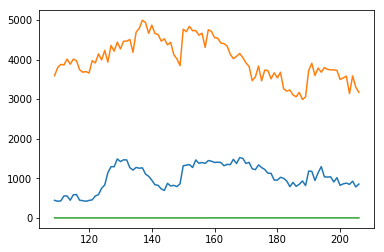

In [14]:
totals = cell.groupby("frame").sum()
#for c in ["green", "red", "g_by_r", "rg"]:
for c in ["green", "red", "g_by_r", "rg"]:
   
    plt.plot(totals[c])


In [41]:
cell[(cell["frame"]>110) & (cell["frame"]<120)]

,frame,cell_id,row,col,angle,state,length,width,g_by_r,red,green,rg,time
2724,111,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.770833
2761,112,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.777778
2798,113,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.784722
2835,114,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.791667
2872,115,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.798611
2909,116,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.805556
2946,117,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.812500
2983,118,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.819444
3020,119,11,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.826389
2728,111,12,0.000000,0.000000,0.000000,0,0.000000,0.000000,NaN,NaN,NaN,NaN,0.770833
